In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [20]:
np.random.seed(42)
num_samples = 500

In [21]:
processor_type = np.random.randint(1, 4, num_samples)  # 1 = Intel i5, 2 = Intel i7, 3 = Intel i9
ram_size = np.random.randint(4, 64, num_samples)  # RAM size in GB
storage_capacity = np.random.randint(128, 2000, num_samples)  # SSD storage in GB

laptop_price = (processor_type * 300) + (ram_size * 20) + (storage_capacity * 0.5) + np.random.normal(0, 100, num_samples)

df = pd.DataFrame({'Processor_Type': processor_type, 'RAM_Size': ram_size, 'Storage_Capacity': storage_capacity, 'Laptop_Price': laptop_price})


In [22]:
df['Price_Category'] = pd.cut(df['Laptop_Price'], bins=[0, 800, 1500, 3000], labels=['Low', 'Medium', 'High'])


In [23]:
X = df[['Processor_Type', 'RAM_Size', 'Storage_Capacity']]
y = df['Price_Category']

le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)


In [31]:
print("Random Forest Classification Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nDetailed Classification Report:")
target_names = [str(class_name) for class_name in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

Random Forest Classification Model Evaluation:
Accuracy: 0.9000

Detailed Classification Report:
              precision    recall  f1-score   support

        High       0.90      0.97      0.94        75
         Low       1.00      1.00      1.00         1
      Medium       0.89      0.70      0.78        23
         nan       0.00      0.00      0.00         1

    accuracy                           0.90       100
   macro avg       0.70      0.67      0.68       100
weighted avg       0.89      0.90      0.89       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


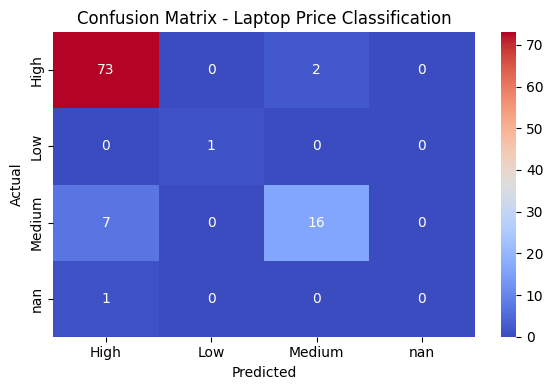

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Laptop Price Classification")
plt.tight_layout()
plt.show()

In [33]:
def predict_price_category(processor, ram, storage):
    specs_array = np.array([[processor, ram, storage]])
    specs_scaled = scaler.transform(specs_array)
    predicted_category = rf_model.predict(specs_scaled)
    return le.inverse_transform(predicted_category)[0]


In [34]:
print("\nSample Predictions:")
test_specs = [(2, 16, 512), (3, 32, 1024), (1, 8, 256)]
for specs in test_specs:
    category = predict_price_category(*specs)
    print(f"For Processor {specs[0]}, RAM {specs[1]}GB, Storage {specs[2]}GB -> Predicted Price Category: {category}")


Sample Predictions:
For Processor 2, RAM 16GB, Storage 512GB -> Predicted Price Category: Medium
For Processor 3, RAM 32GB, Storage 1024GB -> Predicted Price Category: High
For Processor 1, RAM 8GB, Storage 256GB -> Predicted Price Category: Low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Seed for reproducibility
np.random.seed(42)
num_samples = 500

# Generate synthetic data
processor_type = np.random.randint(1, 4, num_samples)  # 1 = Intel i5, 2 = Intel i7, 3 = Intel i9
ram_size = np.random.randint(4, 64, num_samples)  # RAM size in GB
storage_capacity = np.random.randint(128, 2000, num_samples)  # SSD storage in GB

laptop_price = (processor_type * 300) + (ram_size * 20) + (storage_capacity * 0.5) + np.random.normal(0, 100, num_samples)

df = pd.DataFrame({'Processor_Type': processor_type, 'RAM_Size': ram_size, 'Storage_Capacity': storage_capacity, 'Laptop_Price': laptop_price})

# Categorize laptop prices
df['Price_Category'] = pd.cut(df['Laptop_Price'], bins=[0, 800, 1500, 3000], labels=['Low', 'Medium', 'High'])

# Features and labels
X = df[['Processor_Type', 'RAM_Size', 'Storage_Capacity']]
y = df['Price_Category']

# Convert categorical labels to numerical format
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Classification Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Laptop Price Classification")
plt.tight_layout()
plt.show()

# Prediction function
def predict_price_category(processor, ram, storage):
    specs_array = np.array([[processor, ram, storage]])
    specs_scaled = scaler.transform(specs_array)
    predicted_category = rf_model.predict(specs_scaled)
    return le.inverse_transform(predicted_category)[0]

# Sample predictions
print("\nSample Predictions:")
test_specs = [(2, 16, 512), (3, 32, 1024), (1, 8, 256)]
for specs in test_specs:
    category = predict_price_category(*specs)
    print(f"For Processor {specs[0]}, RAM {specs[1]}GB, Storage {specs[2]}GB -> Predicted Price Category: {category}")